# Importing data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import os

from pathlib import Path

In [7]:
SAMPLING_RATE = 1000.0

In [8]:
raw_dir = Path(Path(os.getcwd()).parent, 'data', 'raw')
raw_dir

PosixPath('/home/zheri-laptop/Projects/signal-processing-demo/data/raw')

In [9]:
data_dirs = []
for path in raw_dir.iterdir():
    data_dirs.append(path)
data_dirs

[PosixPath('/home/zheri-laptop/Projects/signal-processing-demo/data/raw/healthy'),
 PosixPath('/home/zheri-laptop/Projects/signal-processing-demo/data/raw/faulty_1'),
 PosixPath('/home/zheri-laptop/Projects/signal-processing-demo/data/raw/faulty_2'),
 PosixPath('/home/zheri-laptop/Projects/signal-processing-demo/data/raw/faulty_3'),
 PosixPath('/home/zheri-laptop/Projects/signal-processing-demo/data/raw/faulty_4')]

## Verifying data

In [49]:
sample_data_path = Path(raw_dir, 'faulty_4')
sample_data_path

PosixPath('/home/zheri-laptop/Projects/signal-processing-demo/data/raw/faulty_4')

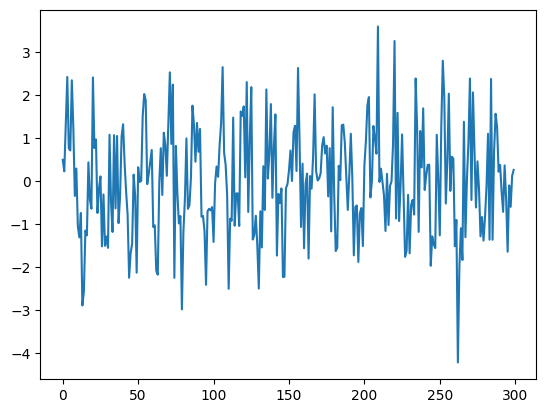

In [50]:
sample_paths = [path for path in sample_data_path.iterdir()]
sample_data = np.load(sample_paths[0])
plt.plot(sample_data[:300])

## Preprocessing

In [41]:
SAMPLING_RATE = 1000.0
DURATION = 5.0
N = SAMPLING_RATE * DURATION
MAX_FREQ = 100.0

In [40]:
def compute_fft(signal: np.ndarray, fs: float = SAMPLING_RATE):
    N = signal.shape[0]

    fft_vals = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, d=1/fs)

    # Keep only positive frequencies
    pos_mask = freqs >= 0
    return freqs[pos_mask], np.abs(fft_vals[pos_mask])

In [44]:
def preprocess_file(filepath: Path) -> np.ndarray:
    # 1. Load
    signal = np.load(filepath)

    # 2. Sanity checks
    assert signal.ndim == 1, "Signal must be 1D"
    assert len(signal) == int(N), "Unexpected signal length"

    # 3. Remove DC offset
    signal = signal - np.mean(signal)

    # 4. Windowing
    signal = signal * np.hanning(len(signal))

    # 5. FFT
    fft_vals = np.fft.rfft(signal)
    mag = np.abs(fft_vals)

    freqs = np.fft.rfftfreq(len(signal), d=1.0 / SAMPLING_RATE)

    # 6. Select frequency range 0–100 Hz
    mask = freqs <= MAX_FREQ
    mag = mag[mask]

    # 7. Normalize magnitude to [0, 1]
    mag = mag / np.max(mag)

    return mag

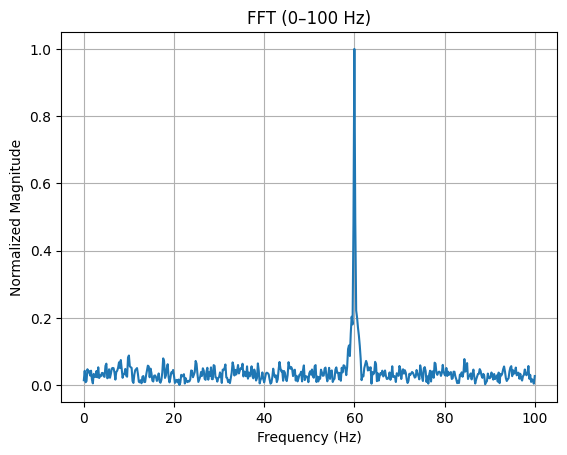

In [51]:
mag = preprocess_file(sample_paths[0])
freqs = np.linspace(0, 100, len(mag))

plt.plot(freqs, mag)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Magnitude")
plt.title("FFT (0–100 Hz)")
plt.grid(True)
plt.show()